In [1]:
# Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
# Decoding newswires back to test (in case you're curious)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])   # note that indices are offset by 3 because 1, 1, and 2 are reserved indices for "padding","start of sequence", and "unknown".

557056/550378 [==============================] - 1s 1us/step


In [8]:
train_labels[10]

3

## Preparing the Data 
Exact same code as in the movie review example


In [9]:
# vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
# vectorize the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
# The built in way in Keras to do the above is the following
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the Network

In [12]:
# model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [14]:
# compiling the model
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics= ['accuracy'])

In [15]:
# Validating our approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the Model

In [16]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 462us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 3s 324us/step - loss: 1.4452 - acc: 0.6877 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 311us/step - loss: 1.0953 - acc: 0.7656 - val_loss: 1.1717 - val_acc: 0.7440
Epoch 4/20
7982/7982 [==============================] - 3s 340us/step - loss: 0.8701 - acc: 0.8156 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 3s 338us/step - loss: 0.7036 - acc: 0.8475 - val_loss: 0.9847 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 309us/step - loss: 0.5669 - acc: 0.8800 - val_loss: 0.9406 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 284us/step - loss: 0.4585 - acc: 0.9052 - val_loss: 0.9082 - val_acc: 0.8010


## Visualizing loss and accuracy

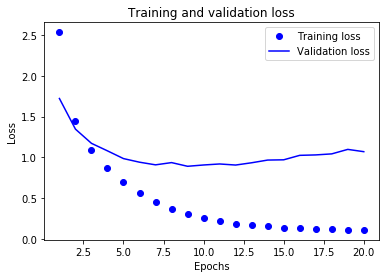

In [17]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
% matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

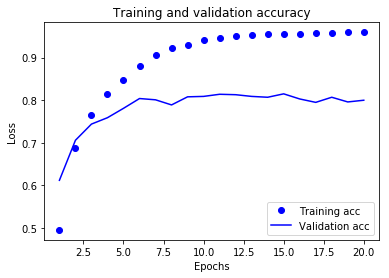

In [18]:
# plotting the training and validation accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Retrain the model from scratch (to overcome overfitting)

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 402us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 287us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 3s 348us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 2s 279us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 2s 297us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 2s 295us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 2s 304us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [20]:
# final results
results

[1.0222080197593302, 0.77560106861941647]

In [21]:
# compare to random baselin
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.182546749777382

## Predictions on New Data

In [22]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
# the largest entry is the predicted class - the class with the highest probability
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

Another way to encode the labels would be to cast them as an integer tensor, like this:

In [27]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss function used in listing 3.21, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, you should use sparse_categorical_ crossentropy:

In [28]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.

## A model with an information bottleneck (few hidden units in hidden layers)

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 529us/step - loss: 2.6583 - acc: 0.3760 - val_loss: 1.9689 - val_acc: 0.5290
Epoch 2/20
7982/7982 [==============================] - 3s 378us/step - loss: 1.6662 - acc: 0.6213 - val_loss: 1.5409 - val_acc: 0.6230
Epoch 3/20
7982/7982 [==============================] - 3s 384us/step - loss: 1.3337 - acc: 0.6689 - val_loss: 1.3942 - val_acc: 0.6800
Epoch 4/20
7982/7982 [==============================] - 3s 421us/step - loss: 1.1426 - acc: 0.7280 - val_loss: 1.3238 - val_acc: 0.6980
Epoch 5/20
7982/7982 [==============================] - 3s 399us/step - loss: 1.0110 - acc: 0.7458 - val_loss: 1.2701 - val_acc: 0.7020
Epoch 6/20
7982/7982 [==============================] - 3s 435us/step - loss: 0.9095 - acc: 0.7577 - val_loss: 1.2769 - val_acc: 0.7070
Epoch 7/20
7982/7982 [==============================] - 3s 421us/step - loss: 0.8297 - acc: 0.7741 - val_loss: 1.2571 - val_acc: 0.7110


The network now peaks at ~71% validation accuracy, an 7% absolute drop. This drop is mostly due to the fact that you’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these eight-dimensional representations, but not all of it.

## Wrapping up

* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
* In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution over the N output classes.
* Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
* There are two ways to handle labels in multiclass classification:
     * Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
     * Encoding the labels as integers and using the sparse_categorical_crossentropy loss function
* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.
